In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

In [ ]:
# Veri artırma
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("nirmalsankalana/rice-leaf-disease-image")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/rice-leaf-disease-image


In [ ]:
train_generator = datagen.flow_from_directory(
    path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

Found 4747 images belonging to 4 classes.


In [ ]:
val_generator = datagen.flow_from_directory(
    path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

Found 1185 images belonging to 4 classes.


In [ ]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [ ]:
for layer in base_model.layers:
    layer.trainable = False


In [ ]:
x = Flatten()(base_model.output)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
output = Dense(train_generator.num_classes, activation='softmax')(x)

In [ ]:
model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
'''model.fit(train_generator, validation_data=val_generator, epochs=3)
from sklearn.metrics import classification_report
import numpy as np

y_pred = model.predict(val_generator, verbose=0)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = val_generator.classes

print(classification_report(y_true_classes, y_pred_classes, digits=4))
'''

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/3
149/149 ━━━━━━━━━━━━━━━━━━━━ 73s 474ms/step - accuracy: 0.6441 - loss: 1.1778 - val_accuracy: 0.8928 - val_loss: 0.3091
Epoch 2/3
149/149 ━━━━━━━━━━━━━━━━━━━━ 70s 472ms/step - accuracy: 0.8791 - loss: 0.3425 - val_accuracy: 0.9376 - val_loss: 0.1850
Epoch 3/3
149/149 ━━━━━━━━━━━━━━━━━━━━ 69s 466ms/step - accuracy: 0.9177 - loss: 0.2107 - val_accuracy: 0.9527 - val_loss: 0.1422
              precision    recall  f1-score   support

           0     0.9639    0.9304    0.9469       316
           1     0.9317    0.8993    0.9152       288
           2     0.9226    0.9688    0.9451       320
           3     0.9812    1.0000    0.9905       261

    accuracy                         0.9485      1185
   macro avg     0.9499    0.9496    0.9494      1185
weighted avg     0.9487    0.9485    0.9483      1185



In [ ]:
'''model.fit(train_generator, validation_data=val_generator, epochs=6)
from sklearn.metrics import classification_report
import numpy as np

y_pred = model.predict(val_generator, verbose=0)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = val_generator.classes

print(classification_report(y_true_classes, y_pred_classes, digits=4))
'''

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/6
149/149 ━━━━━━━━━━━━━━━━━━━━ 82s 462ms/step - accuracy: 0.6438 - loss: 1.0925 - val_accuracy: 0.8835 - val_loss: 0.3253
Epoch 2/6
149/149 ━━━━━━━━━━━━━━━━━━━━ 61s 410ms/step - accuracy: 0.8695 - loss: 0.3347 - val_accuracy: 0.9198 - val_loss: 0.2145
Epoch 3/6
149/149 ━━━━━━━━━━━━━━━━━━━━ 61s 408ms/step - accuracy: 0.9143 - loss: 0.2324 - val_accuracy: 0.9468 - val_loss: 0.1439
Epoch 4/6
149/149 ━━━━━━━━━━━━━━━━━━━━ 61s 410ms/step - accuracy: 0.9228 - loss: 0.1982 - val_accuracy: 0.9460 - val_loss: 0.1415
Epoch 5/6
149/149 ━━━━━━━━━━━━━━━━━━━━ 62s 415ms/step - accuracy: 0.9474 - loss: 0.1568 - val_accuracy: 0.9646 - val_loss: 0.1028
Epoch 6/6
149/149 ━━━━━━━━━━━━━━━━━━━━ 61s 412ms/step - accuracy: 0.9433 - loss: 0.1516 - val_accuracy: 0.9755 - val_loss: 0.0764
              precision    recall  f1-score   support

           0     0.9628    0.9842    0.9734       316
           1     0.9775    0.9062    0.9405       288
           2     0.9489    0.9875    0.9678       320
   

In [ ]:
'''model.fit(train_generator, validation_data=val_generator, epochs=9)
from sklearn.metrics import classification_report
import numpy as np

y_pred = model.predict(val_generator, verbose=0)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = val_generator.classes

print(classification_report(y_true_classes, y_pred_classes, digits=4))
'''

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/9
149/149 ━━━━━━━━━━━━━━━━━━━━ 81s 530ms/step - accuracy: 0.5715 - loss: 1.5588 - val_accuracy: 0.8253 - val_loss: 0.4259
Epoch 2/9
149/149 ━━━━━━━━━━━━━━━━━━━━ 66s 444ms/step - accuracy: 0.8476 - loss: 0.3986 - val_accuracy: 0.9105 - val_loss: 0.2428
Epoch 3/9
149/149 ━━━━━━━━━━━━━━━━━━━━ 66s 445ms/step - accuracy: 0.9008 - loss: 0.2777 - val_accuracy: 0.9435 - val_loss: 0.1673
Epoch 4/9
149/149 ━━━━━━━━━━━━━━━━━━━━ 67s 450ms/step - accuracy: 0.9138 - loss: 0.2302 - val_accuracy: 0.9418 - val_loss: 0.1616
Epoch 5/9
149/149 ━━━━━━━━━━━━━━━━━━━━ 67s 446ms/step - accuracy: 0.9297 - loss: 0.1906 - val_accuracy: 0.9688 - val_loss: 0.0962
Epoch 6/9
149/149 ━━━━━━━━━━━━━━━━━━━━ 67s 448ms/step - accuracy: 0.9307 - loss: 0.1749 - val_accuracy: 0.9713 - val_loss: 0.0776
Epoch 7/9
149/149 ━━━━━━━━━━━━━━━━━━━━ 68s 453ms/step - accuracy: 0.9439 - loss: 0.1398 - val_accuracy: 0.9713 - val_loss: 0.0834
Epoch 8/9
149/149 ━━━━━━━━━━━━━━━━━━━━ 66s 443ms/step - accuracy: 0.9508 - loss: 0.1296 - 

In [ ]:
'''model.fit(train_generator, validation_data=val_generator, epochs=12)
from sklearn.metrics import classification_report
import numpy as np

y_pred = model.predict(val_generator, verbose=0)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = val_generator.classes

print(classification_report(y_true_classes, y_pred_classes, digits=4))
'''

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/12
149/149 ━━━━━━━━━━━━━━━━━━━━ 71s 460ms/step - accuracy: 0.5932 - loss: 1.3197 - val_accuracy: 0.8776 - val_loss: 0.3420
Epoch 2/12
149/149 ━━━━━━━━━━━━━━━━━━━━ 66s 440ms/step - accuracy: 0.8589 - loss: 0.3545 - val_accuracy: 0.9148 - val_loss: 0.2465
Epoch 3/12
149/149 ━━━━━━━━━━━━━━━━━━━━ 66s 443ms/step - accuracy: 0.9065 - loss: 0.2583 - val_accuracy: 0.9342 - val_loss: 0.1935
Epoch 4/12
149/149 ━━━━━━━━━━━━━━━━━━━━ 65s 438ms/step - accuracy: 0.9216 - loss: 0.2036 - val_accuracy: 0.9165 - val_loss: 0.2047
Epoch 5/12
149/149 ━━━━━━━━━━━━━━━━━━━━ 66s 442ms/step - accuracy: 0.9396 - loss: 0.1780 - val_accuracy: 0.9553 - val_loss: 0.1211
Epoch 6/12
149/149 ━━━━━━━━━━━━━━━━━━━━ 67s 446ms/step - accuracy: 0.9356 - loss: 0.1768 - val_accuracy: 0.9637 - val_loss: 0.0896
Epoch 7/12
149/149 ━━━━━━━━━━━━━━━━━━━━ 66s 440ms/step - accuracy: 0.9474 - loss: 0.1405 - val_accuracy: 0.9747 - val_loss: 0.0688
Epoch 8/12
149/149 ━━━━━━━━━━━━━━━━━━━━ 66s 443ms/step - accuracy: 0.9553 - loss: 0

In [ ]:
model.fit(train_generator, validation_data=val_generator, epochs=15)
from sklearn.metrics import classification_report
import numpy as np

y_pred = model.predict(val_generator, verbose=0)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = val_generator.classes

print(classification_report(y_true_classes, y_pred_classes, digits=4))


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
149/149 ━━━━━━━━━━━━━━━━━━━━ 70s 453ms/step - accuracy: 0.6281 - loss: 1.2001 - val_accuracy: 0.8608 - val_loss: 0.3787
Epoch 2/15
149/149 ━━━━━━━━━━━━━━━━━━━━ 64s 431ms/step - accuracy: 0.8729 - loss: 0.3330 - val_accuracy: 0.9291 - val_loss: 0.2139
Epoch 3/15
149/149 ━━━━━━━━━━━━━━━━━━━━ 66s 440ms/step - accuracy: 0.8962 - loss: 0.2752 - val_accuracy: 0.9426 - val_loss: 0.1737
Epoch 4/15
149/149 ━━━━━━━━━━━━━━━━━━━━ 66s 446ms/step - accuracy: 0.9269 - loss: 0.2122 - val_accuracy: 0.9612 - val_loss: 0.1116
Epoch 5/15
149/149 ━━━━━━━━━━━━━━━━━━━━ 67s 447ms/step - accuracy: 0.9357 - loss: 0.1592 - val_accuracy: 0.9713 - val_loss: 0.0867
Epoch 6/15
149/149 ━━━━━━━━━━━━━━━━━━━━ 67s 446ms/step - accuracy: 0.9418 - loss: 0.1491 - val_accuracy: 0.9713 - val_loss: 0.0857
Epoch 7/15
149/149 ━━━━━━━━━━━━━━━━━━━━ 66s 442ms/step - accuracy: 0.9555 - loss: 0.1256 - val_accuracy: 0.9671 - val_loss: 0.0860
Epoch 8/15
149/149 ━━━━━━━━━━━━━━━━━━━━ 66s 445ms/step - accuracy: 0.9479 - loss: 0

In [ ]:
loss, accuracy = model.evaluate(val_generator)
print("Validation Accuracy:", accuracy)
print("Loss:",loss)

38/38 ━━━━━━━━━━━━━━━━━━━━ 14s 351ms/step - accuracy: 0.9829 - loss: 0.0535
Validation Accuracy: 0.9856539964675903
Loss: 0.04433048889040947


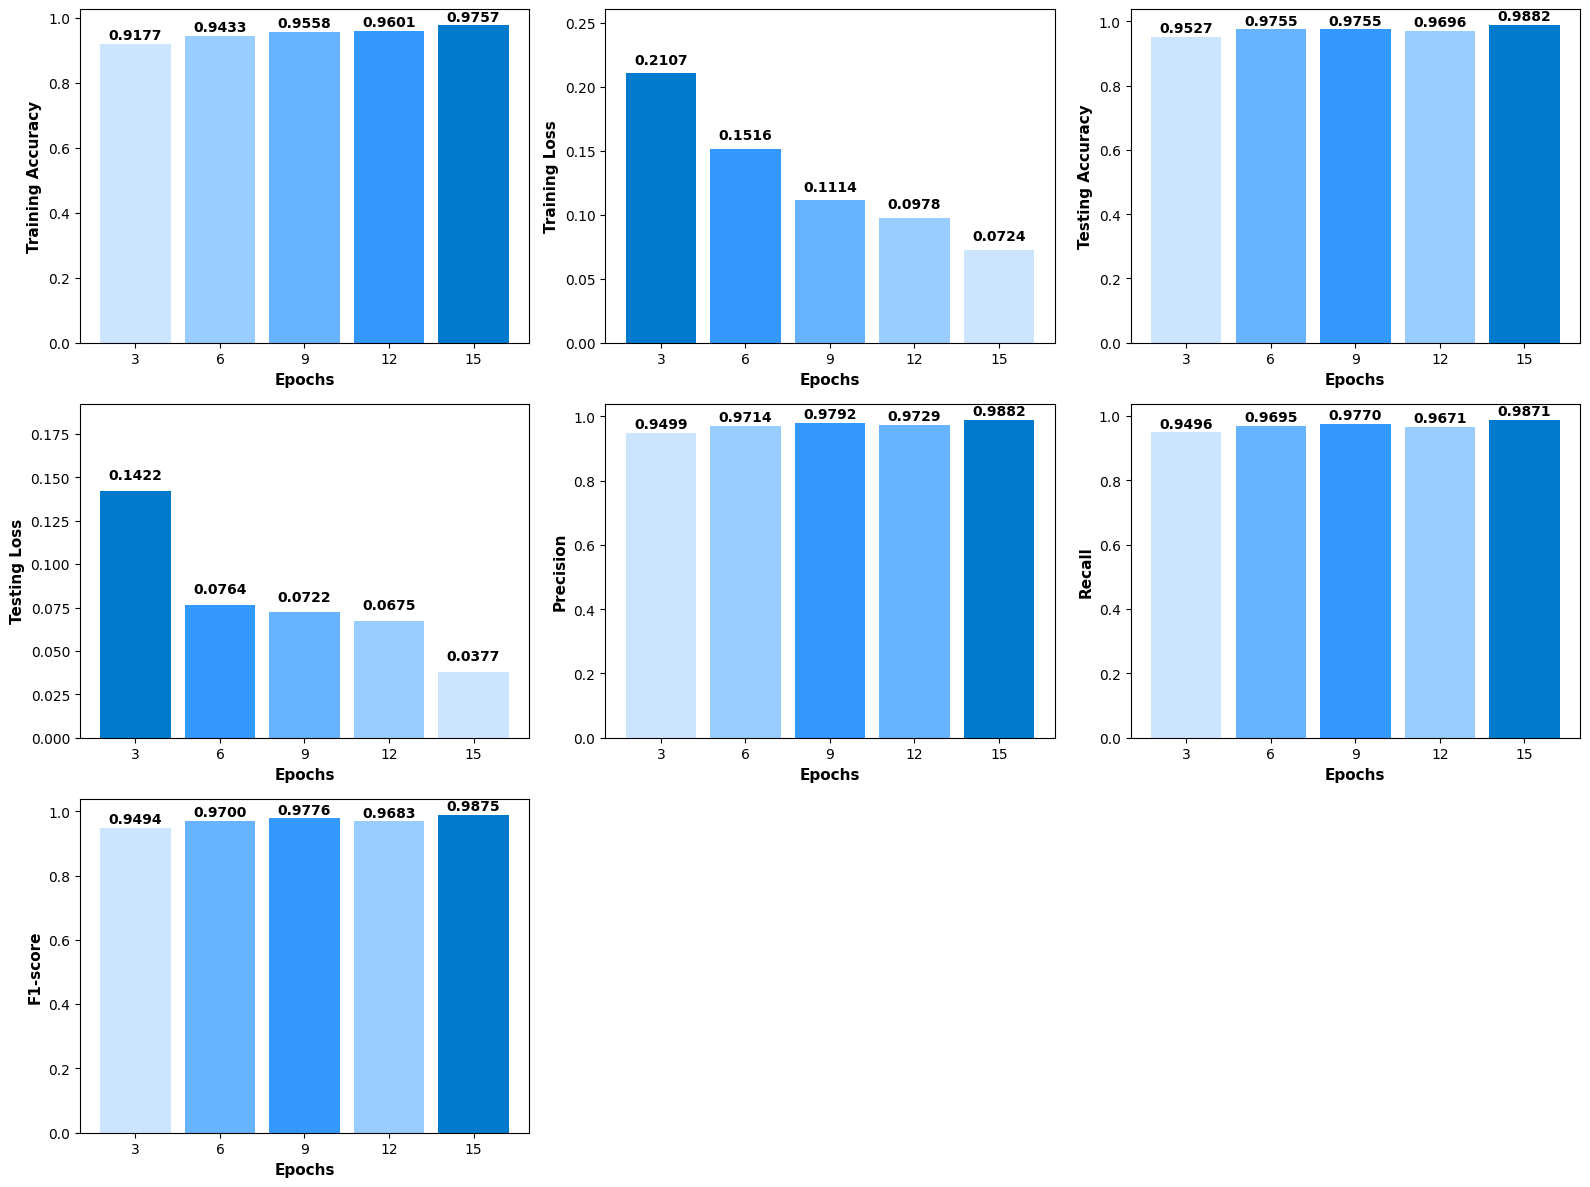

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Veriler
epochs = [3, 6, 9, 12, 15]
train_accuracy = [0.9177, 0.9433, 0.9558, 0.9601, 0.9757]
train_loss = [0.2107, 0.1516, 0.1114, 0.0978, 0.0724]
test_accuracy = [0.9527, 0.9755, 0.9755, 0.9696, 0.9882]
test_loss = [0.1422, 0.0764, 0.0722, 0.0675, 0.0377]
precision_macro = [0.9499, 0.9714, 0.9792, 0.9729, 0.9882]
recall_macro = [0.9496, 0.9695, 0.9770, 0.9671, 0.9871]
f1_macro = [0.9494, 0.9700, 0.9776, 0.9683, 0.9875]


# Renkler (açık maviden koyuya)
colors = ['#cce5ff', '#99ccff', '#66b3ff', '#3399ff', '#007acc']

# Metrikleri ve isimlerini bir araya getirelim
metrics = [
    ("Training Accuracy", train_accuracy),
    ("Training Loss", train_loss),
    ("Testing Accuracy", test_accuracy),
    ("Testing Loss", test_loss),
    ("Precision", precision_macro),
    ("Recall", recall_macro),
    ("F1-score", f1_macro),
]

# Grafik oluştur
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(16, 12))
axs = axs.flatten()

for i, (title, values) in enumerate(metrics):
    # Sort values and epochs together
    sorted_indices = np.argsort(values)
    sorted_values = np.array(values)[sorted_indices]
    sorted_epochs = np.array(epochs)[sorted_indices]

    # Assign colors based on sorted order
    sorted_colors = [colors[j] for j in np.argsort(sorted_values)]


    bars = axs[i].bar(sorted_epochs, sorted_values, color=sorted_colors, width=2.5)
    #axs[i].set_title(title, fontsize=13, fontweight='bold') # Remove title
    axs[i].set_xlabel("Epochs", fontsize=11, fontweight='bold')
    axs[i].set_ylabel(title, fontsize=11, fontweight='bold') # Set metric name as y-label
    axs[i].set_ylim(0, max(values) + 0.05)
    axs[i].set_xticks(epochs) # Set x-axis ticks to the original epoch values

    for bar in bars:
        height = bar.get_height()
        axs[i].text(bar.get_x() + bar.get_width()/2.0, height + 0.005,
                    f'{height:.4f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Boş kalan subplot'u kaldır
for j in range(len(metrics), len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()